In [9]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#importing the data that I will use for this project

df1 = pd.read_csv('highest_earning_players.csv')
df2 = pd.read_csv('country-and-continent-codes-list.csv')
df3 = pd.read_csv('highest_earning_teams.csv')

pd.set_option('display.max_rows', 10)

df1

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter
...,...,...,...,...,...,...,...,...
995,7400,Janne,Mikkonen,Savjz,fi,50734.44,Hearthstone,Collectible Card Game
996,3255,Drew,Biessener,Tidesoftime,us,50449.60,Hearthstone,Collectible Card Game
997,49164,Simone,Liguori,Leta,it,49300.00,Hearthstone,Collectible Card Game
998,43043,Mike,Eichner,Ike,us,48550.00,Hearthstone,Collectible Card Game


In [10]:
#Renaming the Column Two_letter_Country_Code so that is can match with the column
#Country Code in DF1

df2.rename(columns={"Two_Letter_Country_Code":"CountryCode"}, inplace=True)

In [11]:
#Dropping the unneccessary columns in DF2
df2.drop(columns={"Three_Letter_Country_Code", "Country_Number"}, inplace=True)

In [12]:
df2

,Continent_Name,Continent_Code,Country_Name,CountryCode
0,Asia,AS,"Afghanistan, Islamic Republic of",AF
1,Europe,EU,"Albania, Republic of",AL
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ
4,Oceania,OC,American Samoa,AS
...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM
258,Oceania,OC,Disputed Territory,XX
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE
260,Asia,AS,United Nations Neutral Zone,XD


In [13]:
#SHOWING THE TOP 100 eSports Earnings in the US

query = 'SELECT * FROM df1 WHERE countrycode = "us" ORDER BY "TotalUSDPrize" DESC LIMIT 100'
usResult = sqldf(query)
usResult

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,56483,Kyle,Giersdorf,Bugha,us,3141395.05,Fortnite,Battle Royale
1,2615,Saahil,Arora,UNiVeRsE,us,3057237.67,Dota 2,Multiplayer Online Battle Arena
2,5194,Peter,Dager,ppd,us,2995619.62,Dota 2,Multiplayer Online Battle Arena
3,2610,Clinton,Loomis,Fear,us,2551657.34,Dota 2,Multiplayer Online Battle Arena
4,25047,Harrison,Chang,psalm,us,1873138.80,Fortnite,Battle Royale
...,...,...,...,...,...,...,...,...
95,1163,Rori,Bryant-Raible,CauthonLuck,us,67720.00,Heroes of the Storm,Multiplayer Online Battle Arena
96,21718,Sammuel,Hua,bigempct,us,66663.80,Heroes of the Storm,Multiplayer Online Battle Arena
97,21715,Stefen,Anderson,akaface,us,64763.40,Heroes of the Storm,Multiplayer Online Battle Arena
98,21719,Michael,Udall,MichaelUdall,us,64763.40,Heroes of the Storm,Multiplayer Online Battle Arena


In [14]:
# SQL QUERY DISPLAYS THE TOP TEN eSPORTS EARNERS OF ALL TIME
# ALL OF WHICH ARE DOTA 2 PLAYERS

query = 'SELECT * FROM df1 ORDER BY "TotalUSDPrize" DESC LIMIT 10'
topTen = sqldf(query)
topTen

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3304,Johan,Sundstein,N0tail,dk,6952596.58,Dota 2,Multiplayer Online Battle Arena
1,3822,Jesse,Vainikka,JerAx,fi,6470000.02,Dota 2,Multiplayer Online Battle Arena
2,30451,Anathan,Pham,ana,au,6000411.96,Dota 2,Multiplayer Online Battle Arena
3,2811,Sébastien,Debs,Ceb,fr,5554297.41,Dota 2,Multiplayer Online Battle Arena
4,18897,Topias,Taavitsainen,Topson,fi,5470902.57,Dota 2,Multiplayer Online Battle Arena
5,3145,Kuro,Takhasomi,KuroKy,de,5193382.81,Dota 2,Multiplayer Online Battle Arena
6,14671,Amer,Al-Barkawi,Miracle-,jo,4798043.68,Dota 2,Multiplayer Online Battle Arena
7,12579,Ivan,Ivanov,MinD_ContRoL,bg,4579118.16,Dota 2,Multiplayer Online Battle Arena
8,25335,Maroun,Merhej,GH,lb,4193412.69,Dota 2,Multiplayer Online Battle Arena
9,12133,Lasse,Urpalainen,Matumbaman,fi,3765369.04,Dota 2,Multiplayer Online Battle Arena


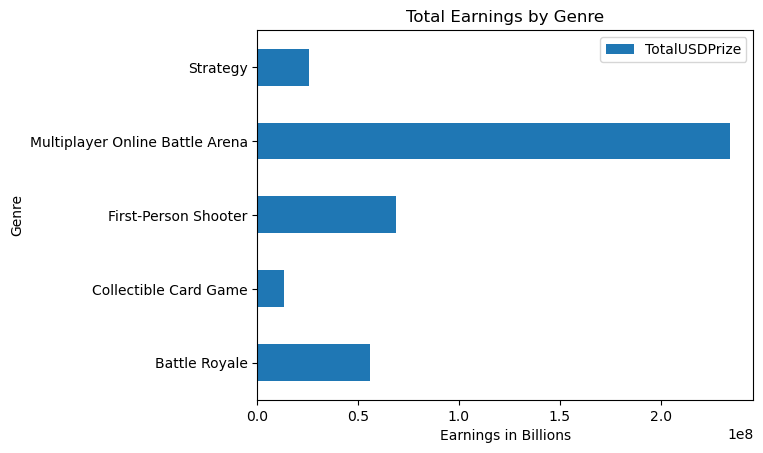

In [15]:
# DISPLAYING A HORIZONTABLE BAR CHART TO SHOW THE TOTAL EARNINGS OF EACH GAMING GENRE

# Splitting the Genres into different categories
genres = (df1['Genre'].str.split('|', expand = True)
             .stack()
             .to_frame(name='Genre'))
genres.index = genres.index.droplevel(1)

# Suming the totals of each genre and creating a Horizontal Bar Graph
ax = (genres.join(df1['TotalUSDPrize'])
       .groupby('Genre')
       .sum()
       .plot(kind='barh', 
             title = 'Total Earnings by Genre'))

#Set the x-axis label
ax.set_xlabel('Earnings in Billions')

# Showing the plot
plt.show()

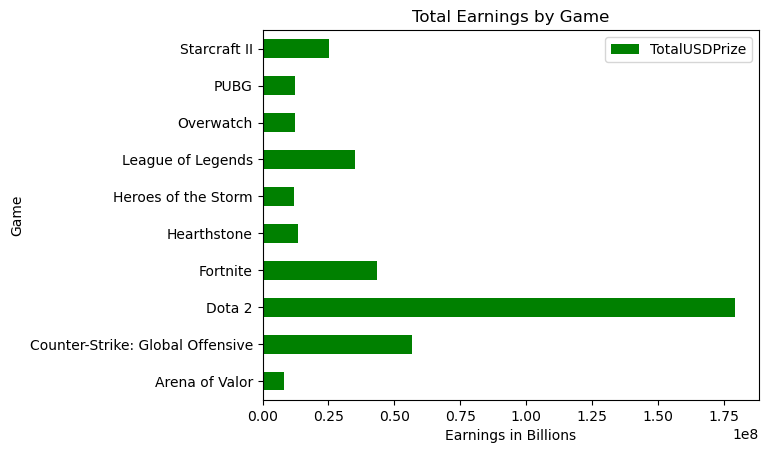

In [16]:
# DISPLAYING A HORIZONTABLE BAR CHART TO SHOW THE TOTAL EARNINGS OF EACH GAMING GENRE

# Splitting the Genres into different categories
genres = (df1['Game'].str.split('|', expand = True)
             .stack()
             .to_frame(name='Game'))
genres.index = genres.index.droplevel(1)

# Suming the totals of each genre and creating a Horizontal Bar Graph
ax = (genres.join(df1['TotalUSDPrize'])
       .groupby('Game')
       .sum()
       .plot(kind='barh', 
             title = 'Total Earnings by Game', 
             color='green'))

#Set the x-axis label
ax.set_xlabel('Earnings in Billions')

# Showing the plot
plt.show()

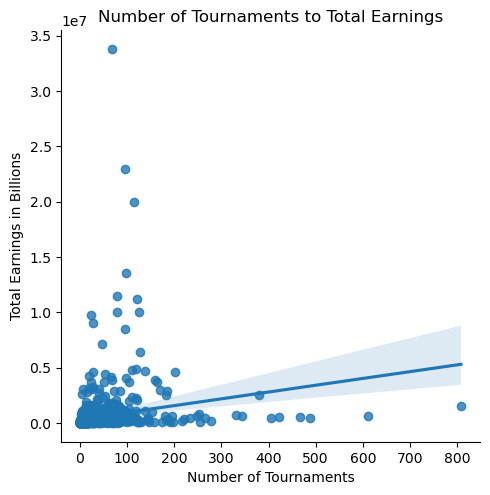

In [17]:
#SCATTER PLOT TO SHOW THE TOTAL NUMBER OF TOURNAMENTS PLAYED AND THE TOTAL EARNINGS

sns.lmplot(x='TotalTournaments', y='TotalUSDPrize', data=df3, fit_reg=True).set(title="Number of Tournaments to Total Earnings"
                                                                               ,xlabel='Number of Tournaments', ylabel='Total Earnings in Billions')

In [18]:
df3

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


In [19]:
# SHOWING THE TOP 10 EARNING TEAMS OF ALL TIME
# ALL OF WHICH ARE DOTA 2 TEAMS

query = 'SELECT * FROM df3 ORDER BY "TotalUSDPrize" DESC LIMIT 10'
topTeamEarnings = sqldf(query)
topTeamEarnings

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,419,OG,33810636.13,68,Dota 2,Multiplayer Online Battle Arena
1,102,Team Liquid,22967431.10,96,Dota 2,Multiplayer Online Battle Arena
2,101,Evil Geniuses,19988670.62,115,Dota 2,Multiplayer Online Battle Arena
3,210,Newbee,13523736.43,98,Dota 2,Multiplayer Online Battle Arena
4,211,Team Secret,11492345.09,79,Dota 2,Multiplayer Online Battle Arena
5,169,Vici Gaming,11182792.92,121,Dota 2,Multiplayer Online Battle Arena
6,227,LGD Gaming,10072755.42,79,Dota 2,Multiplayer Online Battle Arena
7,185,Virtus.pro,10037385.11,125,Dota 2,Multiplayer Online Battle Arena
8,507,Wings Gaming,9739247.35,24,Dota 2,Multiplayer Online Battle Arena
9,623,Paris Saint-Germain Esports,9066946.69,27,Dota 2,Multiplayer Online Battle Arena


In [20]:
# SHOWING THE TOP EARNER OF EACH GAMING CATEGORY

query = 'WITH GamingEarning AS (SELECT *, ROW_NUMBER() OVER(PARTITION BY Game ORDER BY TotalUSDPrize DESC) AS RowNum FROM df3) SELECT * FROM GamingEarning WHERE RowNum = 1 ORDER BY TotalUSDPrize DESC'
topByCategory = sqldf(query)
topByCategory

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre,RowNum
0,419,OG,33810636.13,68,Dota 2,Multiplayer Online Battle Arena,1
1,466,Astralis,8503918.81,95,Counter-Strike: Global Offensive,First-Person Shooter,1
2,145,SK Telecom T1,7139771.24,46,League of Legends,Multiplayer Online Battle Arena,1
3,571,Lazarus,3708150.00,24,Fortnite,Battle Royale,1
4,760,San Francisco Shock,3105000.00,7,Overwatch,First-Person Shooter,1
5,814,Gen.G,2805813.88,15,PUBG,Battle Royale,1
6,430,eStar Gaming,2613323.67,5,Arena of Valor,Multiplayer Online Battle Arena,1
7,181,Jin Air Green Wings,2546572.70,379,Starcraft II,Strategy,1
8,132,MVP,1656839.93,24,Hearthstone,Collectible Card Game,1
9,256,G2 Esports,575312.54,66,Heroes of the Storm,Multiplayer Online Battle Arena,1
